In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Copper_Set.xlsx - Result 1.csv')

C:\Users\vikki\AppData\Local\Temp\ipykernel_9960\1690506665.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Copper_Set.xlsx - Result 1.csv')


In [3]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [5]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

### Although there are NaN's as we are not interested in this column, so we will keep it and drop this columns later  

In [6]:
df['item_date_1'] = df['item_date'].astype(str)
df['item_date_1'] = pd.to_datetime(df['item_date_1'], format='%Y%m%d.%f', errors='coerce').dt.date

df['delivery date_1'] = df['delivery date'].astype(str)
df['delivery date_1'] = pd.to_datetime(df['delivery date_1'], format='%Y%m%d.%f', errors='coerce').dt.date

df['item_date_1'] = pd.to_datetime(df['item_date_1'])
df['delivery date_1'] = pd.to_datetime(df['delivery date_1'])

df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce').astype('float64')

df['customer'] = pd.to_numeric(df['customer'], errors='coerce').astype('Int64')

df['country'] = pd.to_numeric(df['country'], errors='coerce').astype('Int32')

df['application'] = pd.to_numeric(df['application'], errors='coerce').astype('Int32')

#### We will not be requiring the columns 'Ids' and 'selling_price'. So, we will drop them

In [7]:
df = df.drop(columns=['id', 'material_ref'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   item_date        181672 non-null  float64       
 1   quantity tons    181672 non-null  float64       
 2   customer         181672 non-null  Int64         
 3   country          181645 non-null  Int32         
 4   status           181671 non-null  object        
 5   item type        181673 non-null  object        
 6   application      181649 non-null  Int32         
 7   thickness        181672 non-null  float64       
 8   width            181673 non-null  float64       
 9   product_ref      181673 non-null  int64         
 10  delivery date    181672 non-null  float64       
 11  selling_price    181672 non-null  float64       
 12  item_date_1      181670 non-null  datetime64[ns]
 13  delivery date_1  181670 non-null  datetime64[ns]
dtypes: Int32(2), Int64(1

In [9]:
df.select_dtypes(include=['float', 'int']).describe()

,item_date,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181672.0,181645.0,181649.0,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,5.874926e+03,30512209.027968,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.349081e+06,24333815.584025,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,-2.000000e+03,12458.0,25.0,2.0,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,1.097030e+01,30196884.0,26.0,10.0,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.036464e+01,30205242.0,30.0,15.0,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,6.716061e+01,30280416.0,78.0,41.0,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,1.000000e+09,2147483647.0,113.0,99.0,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [10]:
df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x <= 0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x <= 0 else x)

In [11]:
df.isna().sum()

item_date           1
quantity tons       5
customer            1
country            28
status              2
item type           0
application        24
thickness           1
width               0
product_ref         0
delivery date       1
selling_price       8
item_date_1         3
delivery date_1     3
dtype: int64

In [12]:
df['item type'].unique() 

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [13]:
df = df.dropna()

In [14]:
df.head().T

,0,1,2,3,4
item_date,20210401.0,20210401.0,20210401.0,20210401.0,20210401.0
quantity tons,54.151139,768.024839,386.127949,202.411065,785.526262
customer,30156308,30202938,30153963,30349574,30211560
country,28,25,30,32,28
status,Won,Won,Won,Won,Won
item type,W,W,WI,S,W
application,10,41,28,59,10
thickness,2.0,0.8,0.38,2.3,4.0
width,1500.0,1210.0,952.0,1317.0,2000.0
product_ref,1670798778,1668701718,628377,1668701718,640665


#### b. Checking Outliers

In [15]:
df.isnull().sum()

item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
delivery date      0
selling_price      0
item_date_1        0
delivery date_1    0
dtype: int64

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

#### It seems there is no simple relationship between quantity tons and our target variable selling price

#### i. Log transformation -- Skewness correction

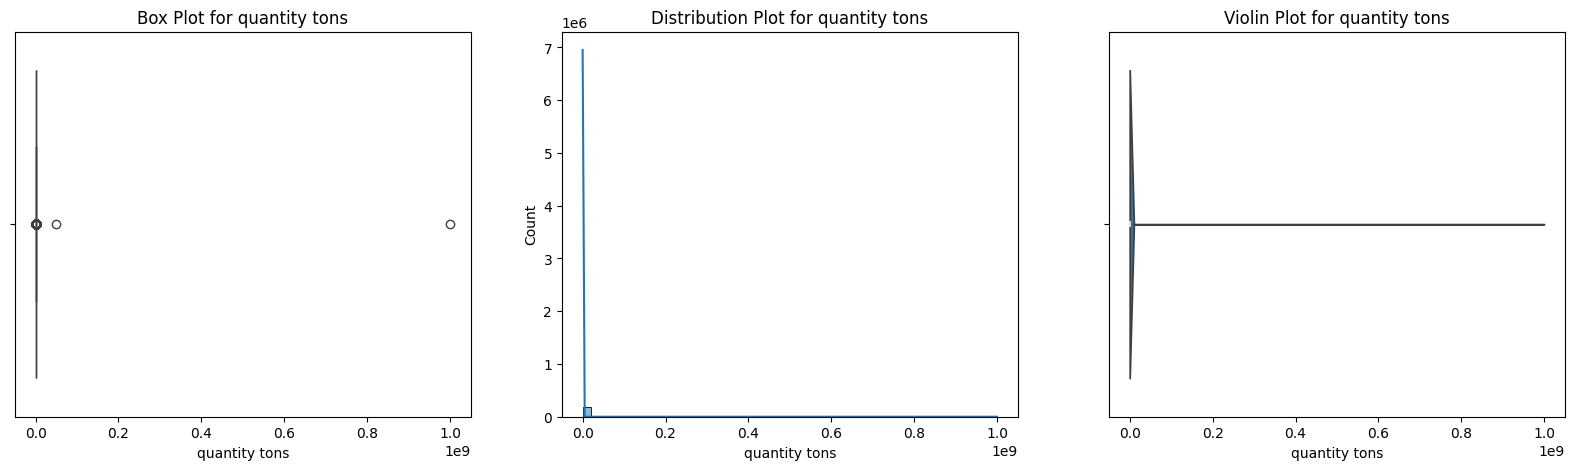

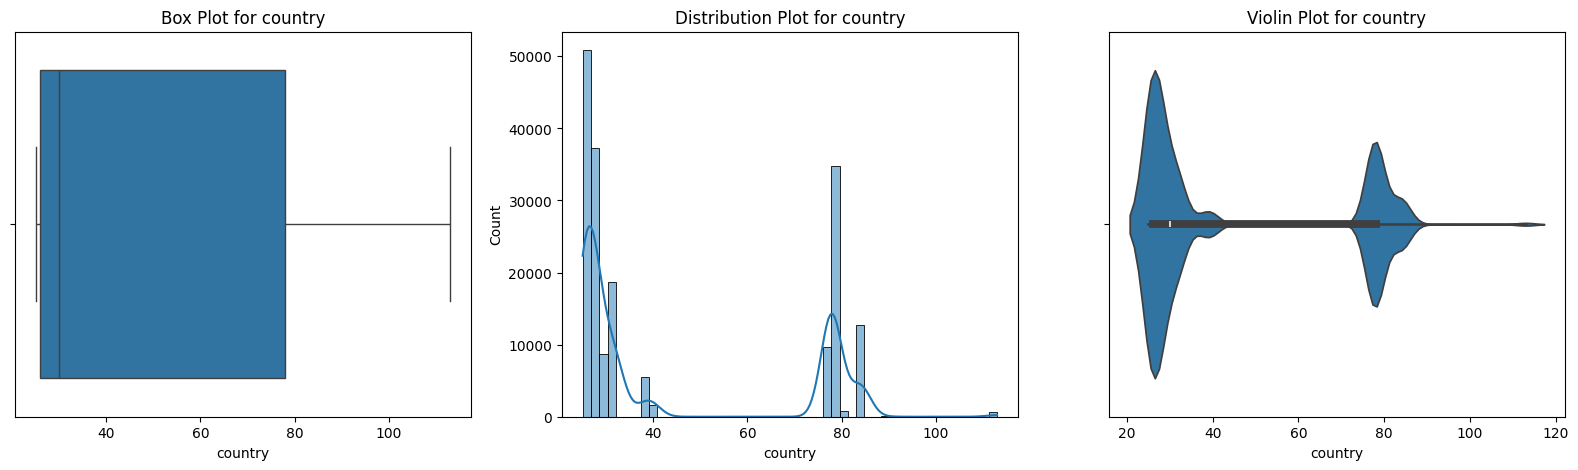

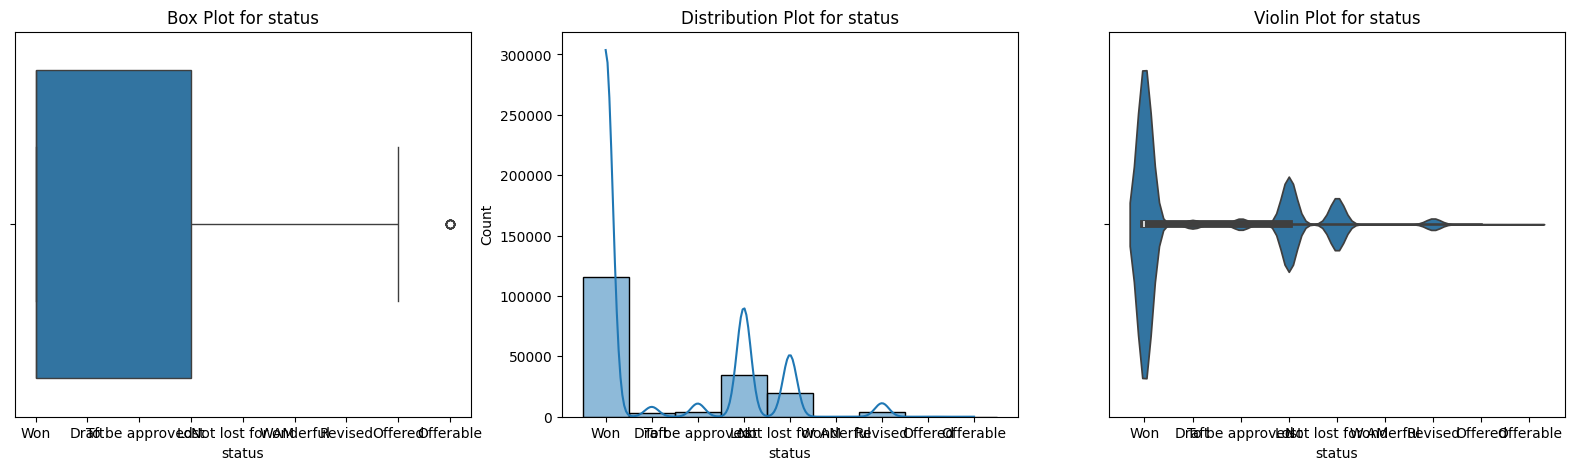

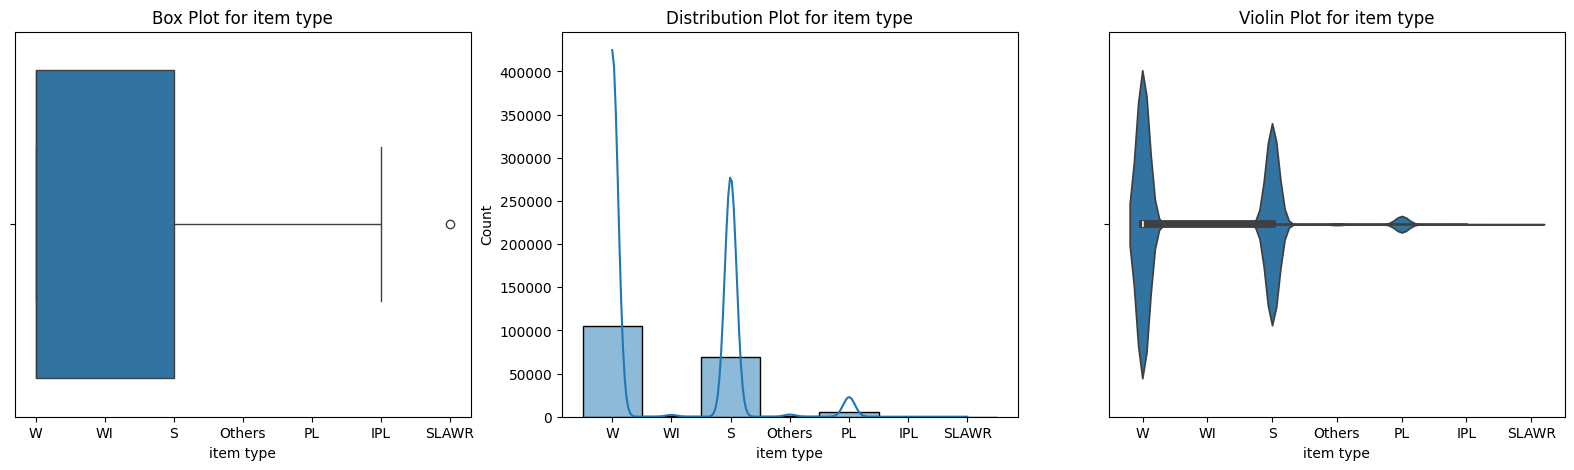

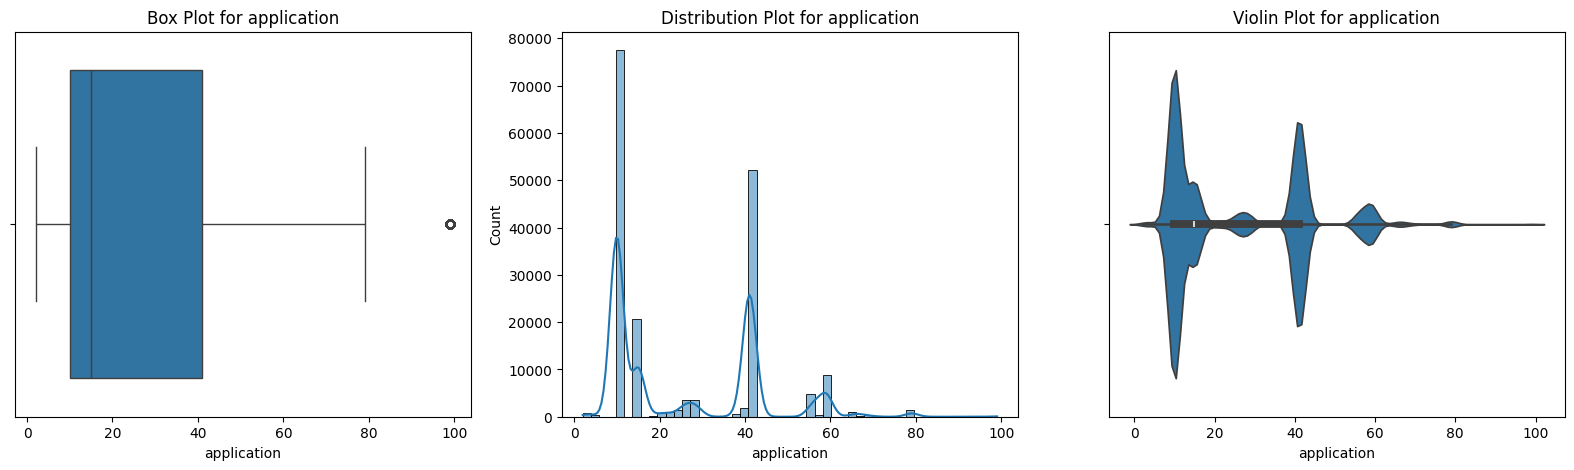

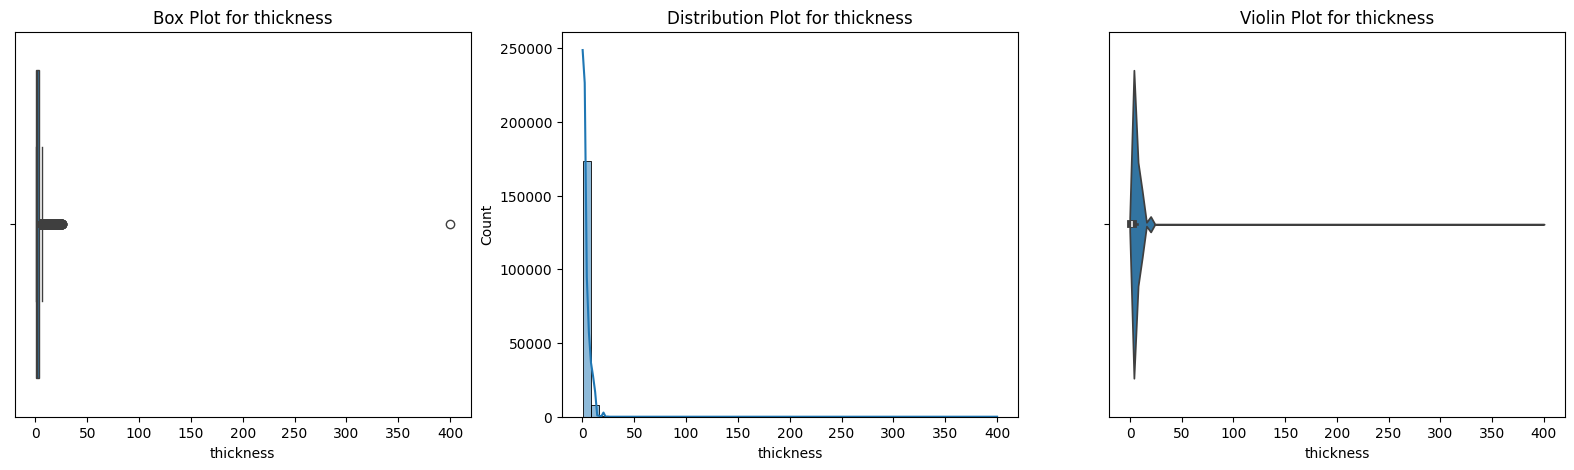

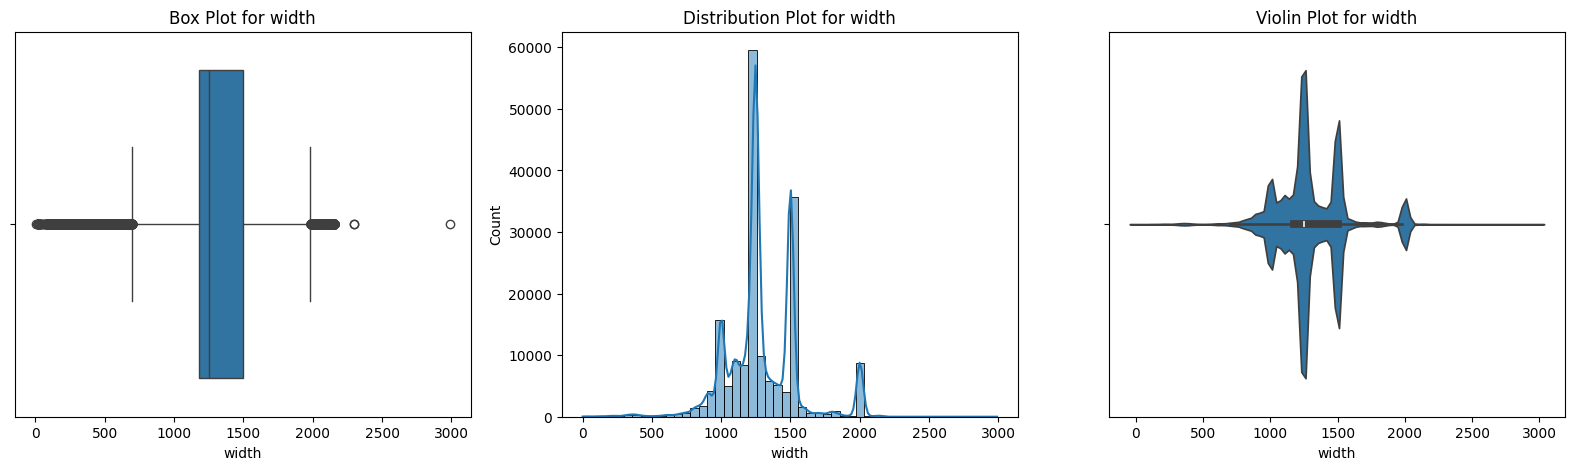

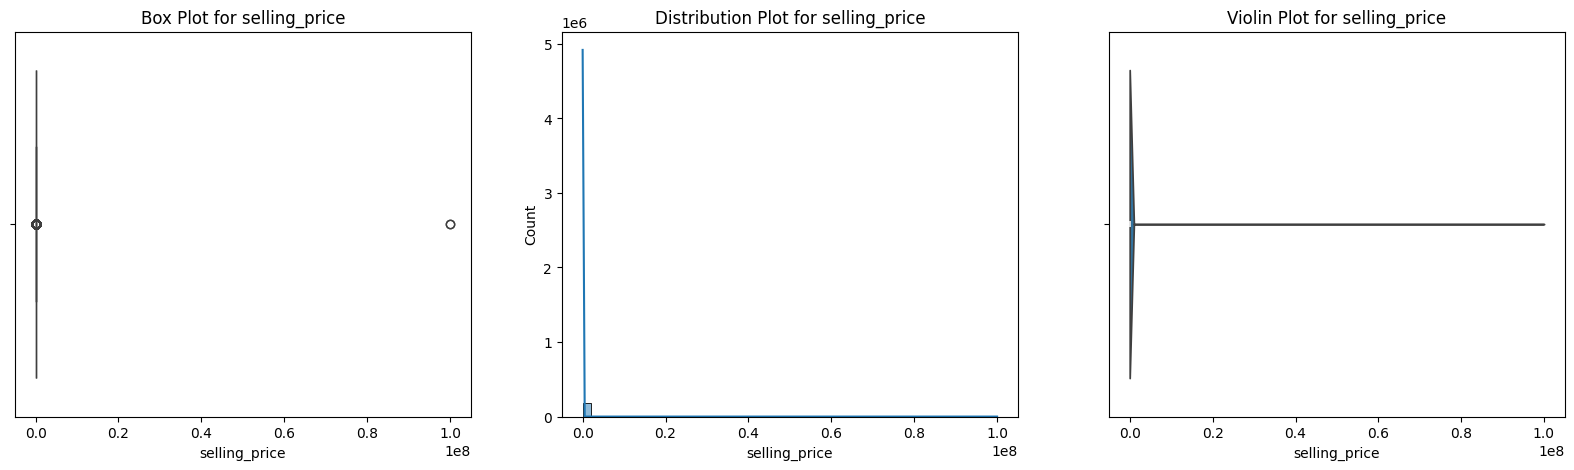

In [17]:
def plot(df, column):
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    sns.boxplot(data=df, x=column, ax=axes[0]).set_title(f'Box Plot for {column}')
    sns.histplot(data=df, x=column, kde=True, bins=50, ax=axes[1]).set_title(f'Distribution Plot for {column}')
    sns.violinplot(data=df, x=column, ax=axes[2]).set_title(f'Violin Plot for {column}')
    plt.show()
     

for i in ['quantity tons', 'country', 'status', 'item type', 'application', 'thickness', 'width', 'selling_price']:
    plot(df, i)
     


In [18]:
df1 = df.copy()

In [19]:
df1['quantity_tons_log'] = np.log(df['quantity tons'])
df1['thickness_log'] = np.log(df['thickness'])
df1['selling_price_log'] = np.log(df['selling_price'])
df1

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1,quantity_tons_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308,28,Won,W,10,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,768.024839,30202938,25,Won,W,41,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,386.127949,30153963,30,Won,WI,28,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,202.411065,30349574,32,Won,S,59,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,785.526262,30211560,28,Won,W,10,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,20200702.0,106.783299,30200854,25,Won,W,41,0.96,1240.0,164141591,20200701.0,602.00,2020-07-02,2020-07-01,4.670802,-0.040822,6.400257
181668,20200702.0,102.482422,30200854,25,Won,W,41,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
181669,20200702.0,208.086469,30200854,25,Won,W,41,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
181670,20200702.0,4.235594,30200854,25,Won,W,41,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105


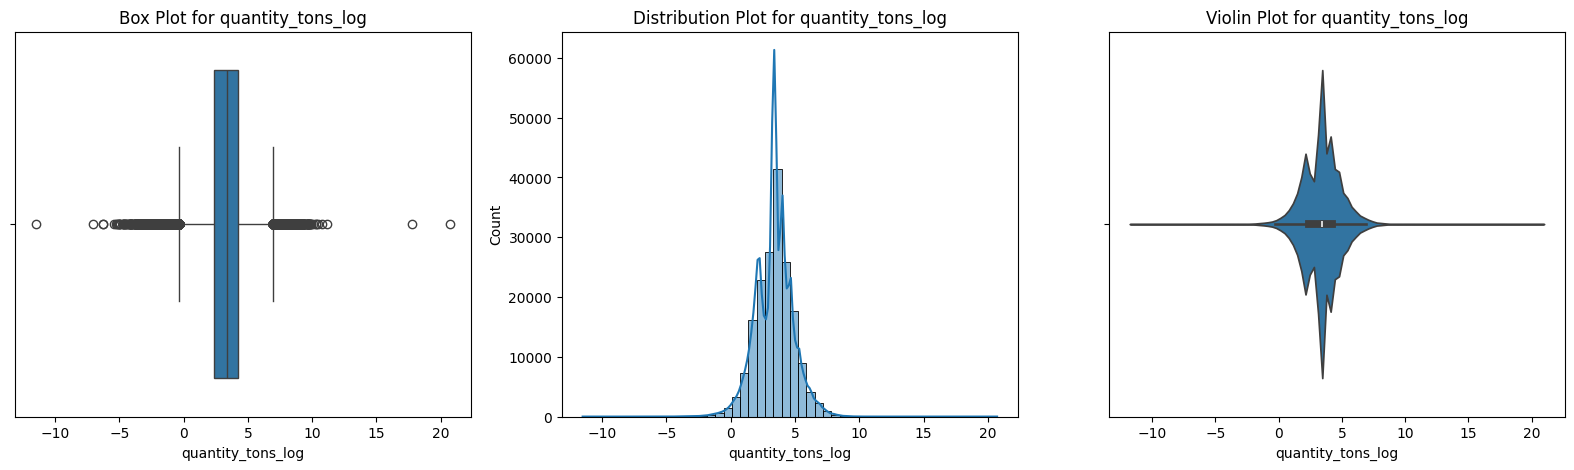

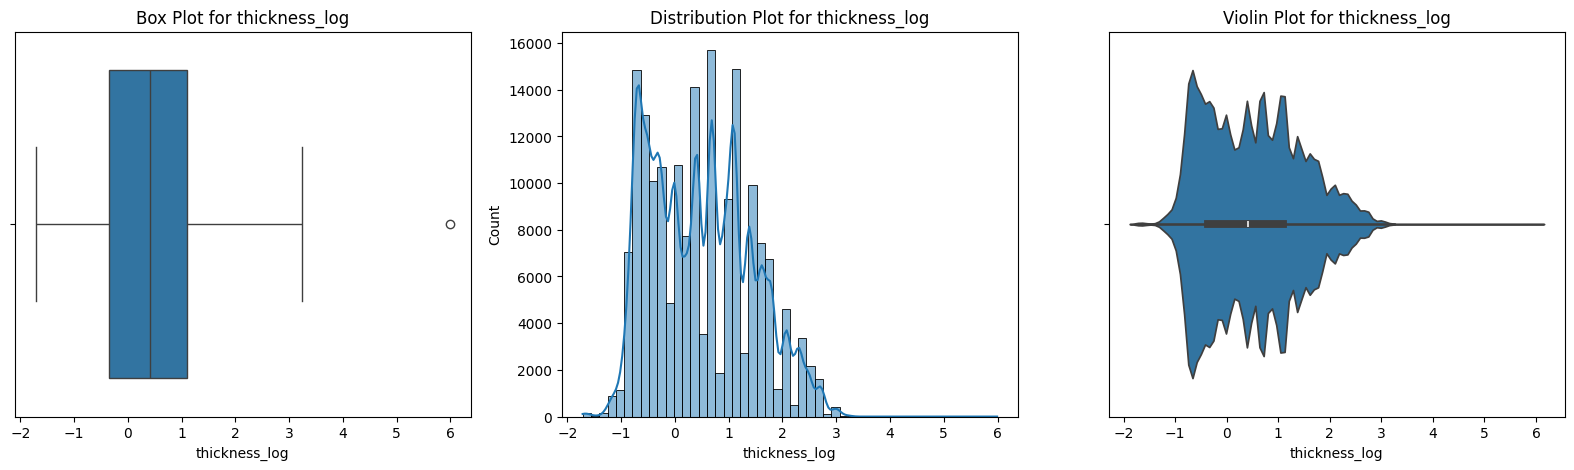

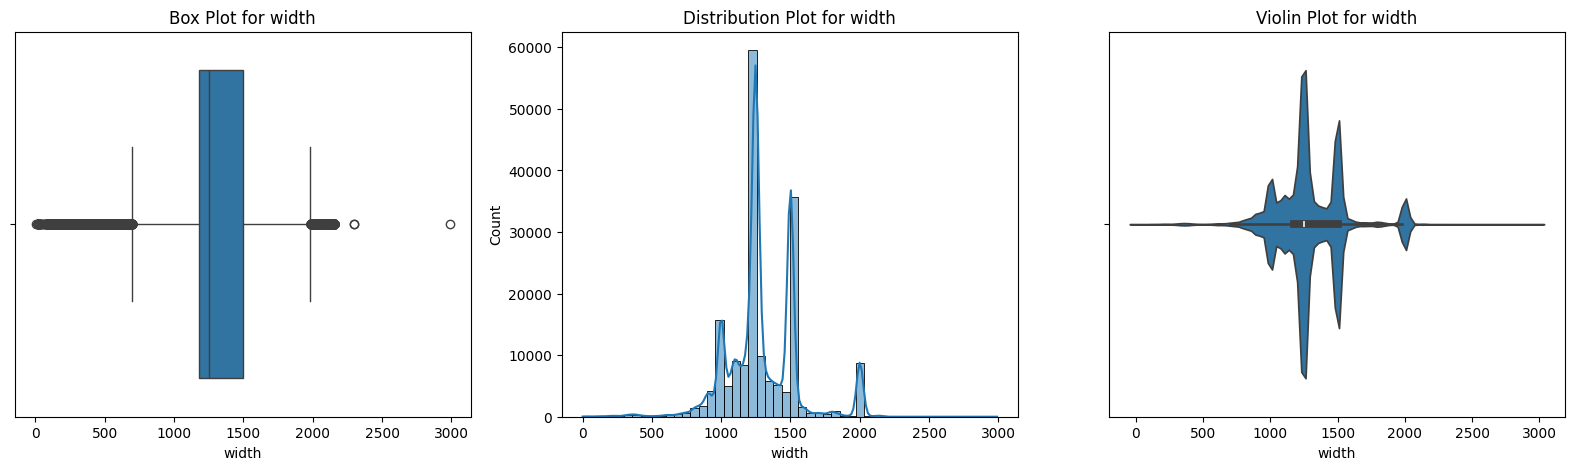

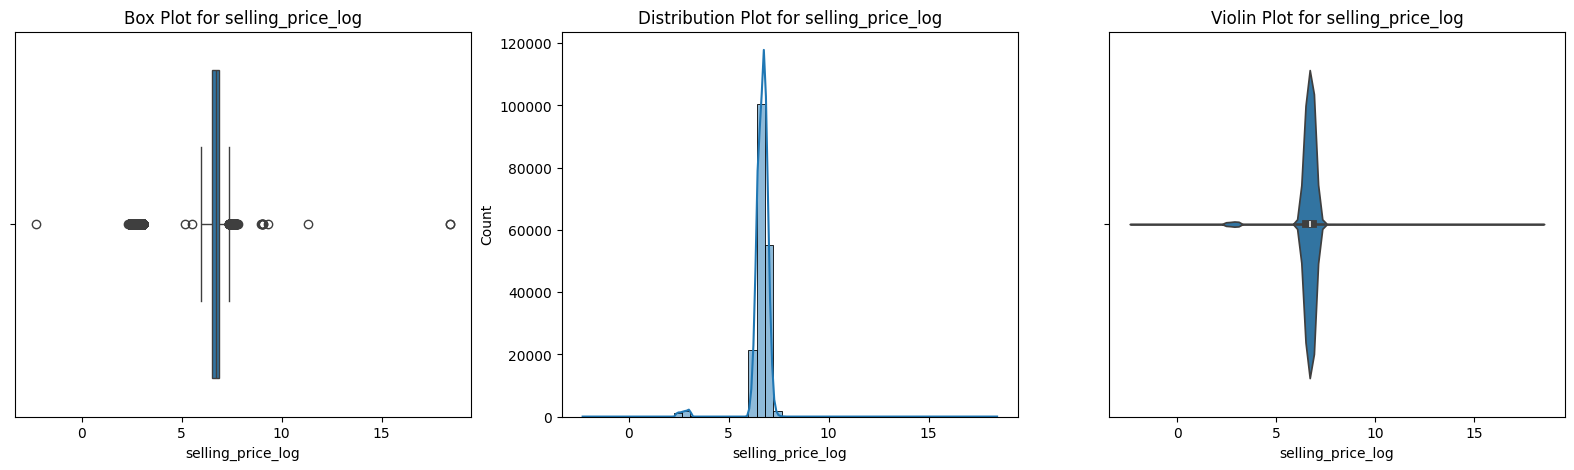

In [20]:
for i in ['quantity_tons_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(df1, i)

In [21]:
def remove_outliers_idr(data, column, threshold=1.5):

    # Calculate the first and third quartiles
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    data[column] = data[column].clip(lower_bound, upper_bound)
    

In [22]:
remove_outliers_idr(df1, 'quantity_tons_log')
remove_outliers_idr(df1, 'thickness_log')
remove_outliers_idr(df1, 'selling_price_log')
remove_outliers_idr(df1, 'width')

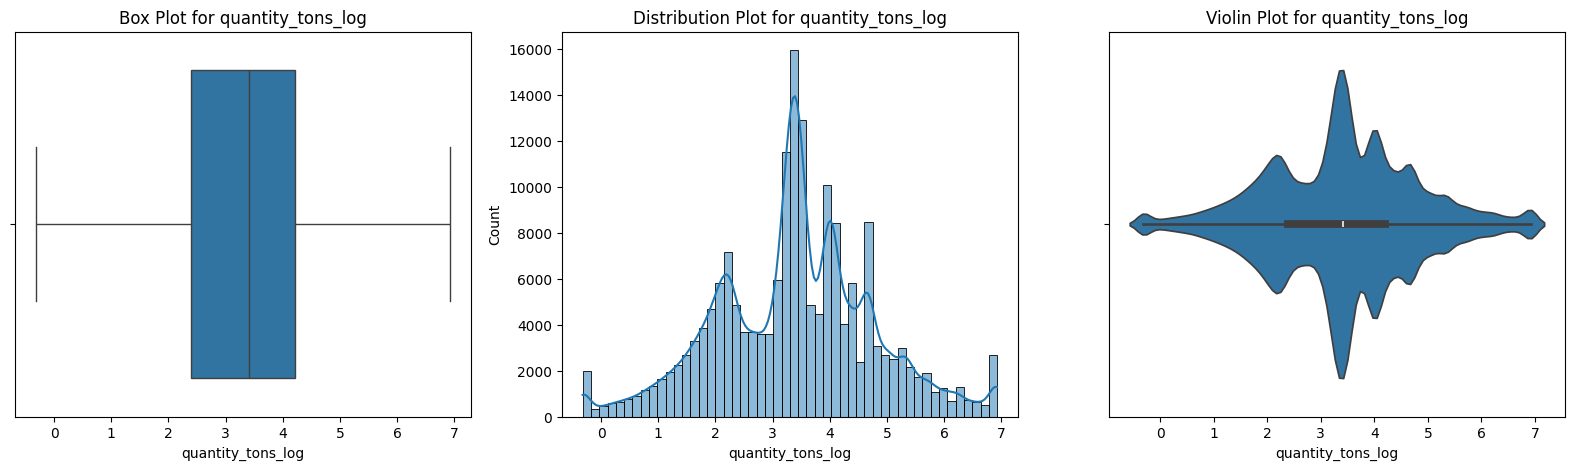

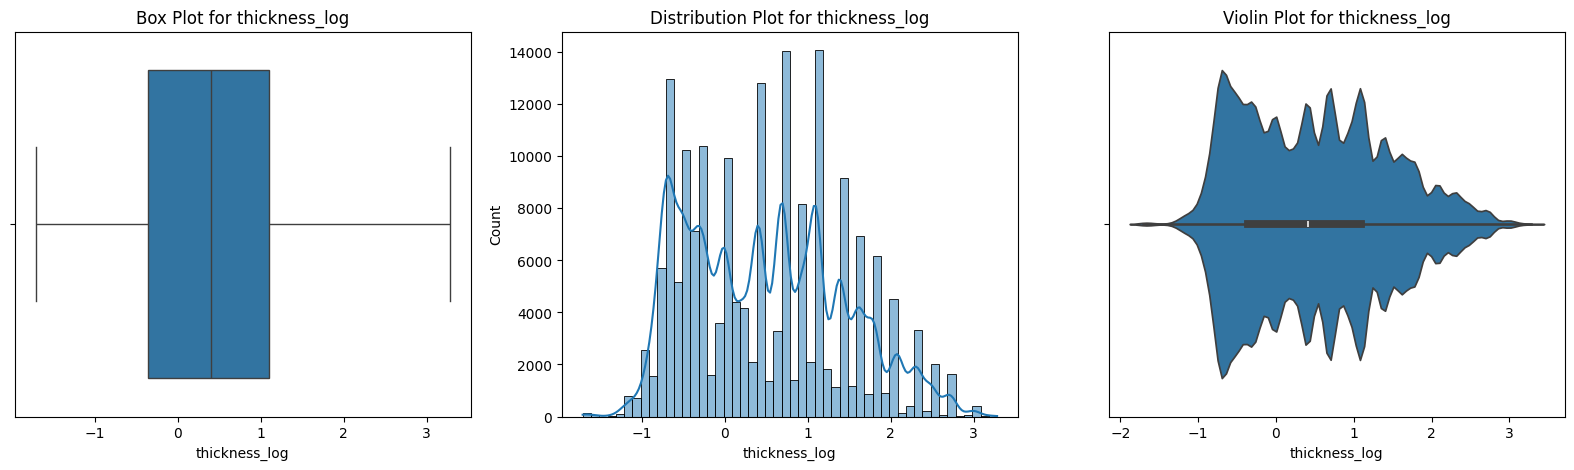

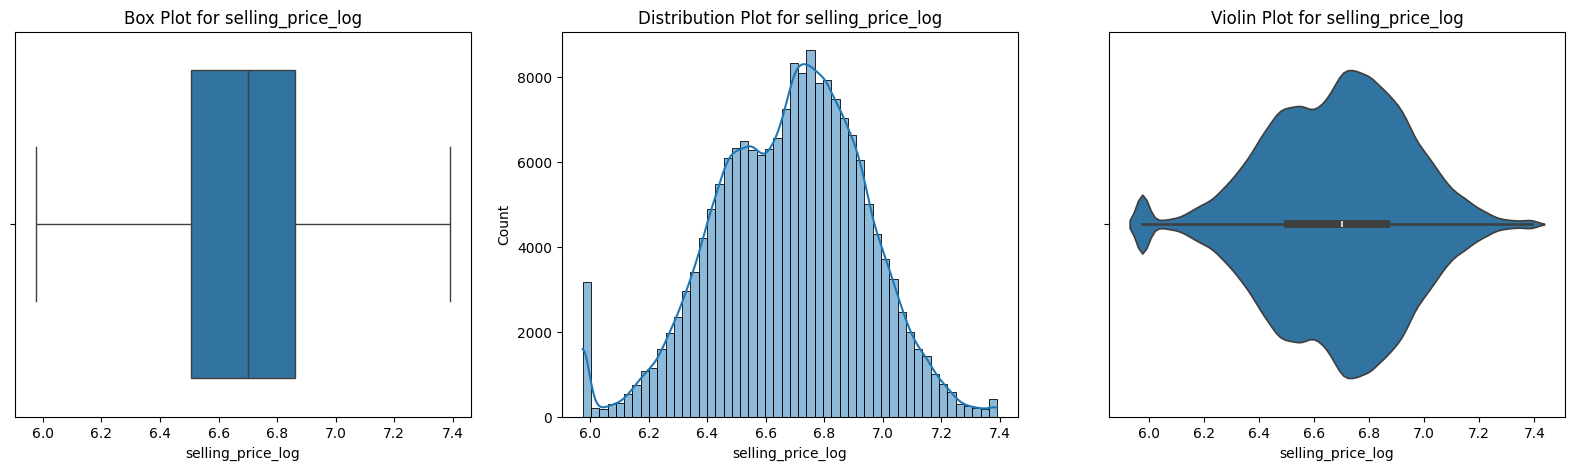

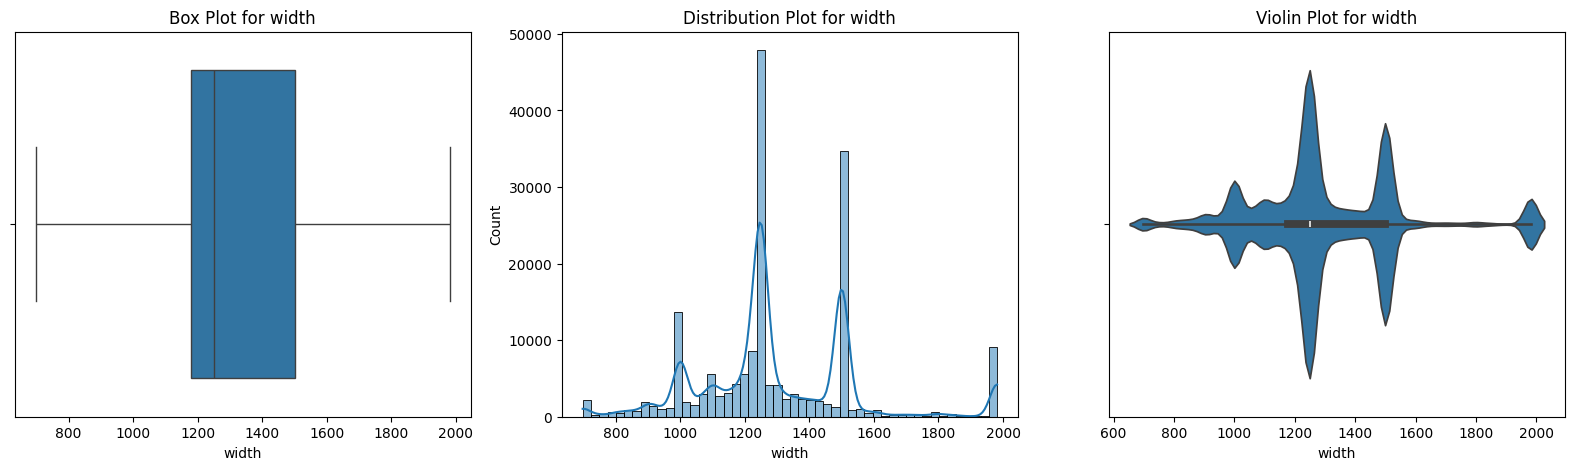

In [23]:
for i in ['quantity_tons_log', 'thickness_log', 'selling_price_log', 'width']:
    plot(df1, i)

In [24]:
df1

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1,quantity_tons_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308,28,Won,W,10,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,768.024839,30202938,25,Won,W,41,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,386.127949,30153963,30,Won,WI,28,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,202.411065,30349574,32,Won,S,59,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,785.526262,30211560,28,Won,W,10,4.00,1981.5,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,20200702.0,106.783299,30200854,25,Won,W,41,0.96,1240.0,164141591,20200701.0,602.00,2020-07-02,2020-07-01,4.670802,-0.040822,6.400257
181668,20200702.0,102.482422,30200854,25,Won,W,41,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
181669,20200702.0,208.086469,30200854,25,Won,W,41,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
181670,20200702.0,4.235594,30200854,25,Won,W,41,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105


In [25]:
df2 = df1.drop(columns=['quantity tons', 'thickness', 'selling_price'])

#### 4. Predicting correct delivery dates

In [26]:
df2

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,thickness_log,selling_price_log
0,20210401.0,30156308,28,Won,W,10,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,30202938,25,Won,W,41,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,30153963,30,Won,WI,28,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,30349574,32,Won,S,59,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,30211560,28,Won,W,10,1981.5,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,20200702.0,30200854,25,Won,W,41,1240.0,164141591,20200701.0,2020-07-02,2020-07-01,4.670802,-0.040822,6.400257
181668,20200702.0,30200854,25,Won,W,41,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
181669,20200702.0,30200854,25,Won,W,41,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
181670,20200702.0,30200854,25,Won,W,41,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105


In [27]:
df2['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [28]:
df2['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [29]:
from sklearn.preprocessing import OrdinalEncoder

In [30]:
df2['item type'] = OrdinalEncoder().fit_transform(df2[['item type']])

In [31]:
df2['status'] = df2['status'].map({'Lost':0, 'Won':1, 'Draft':2, 'To be approved':3, 'Not lost for AM':4,
                                 'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})

In [32]:
df2['item_date_day'] = df2['item_date_1'].dt.day
df2['item_date_month'] = df2['item_date_1'].dt.month
df2['item_date_year'] = df2['item_date_1'].dt.year

In [33]:
df2['date_diff'] = (df2['delivery date_1'] - df2['item_date_1']).dt.days

In [34]:
df2_1 = df2[df2['date_diff'] >= 0]
df2_2 = df2[df2['date_diff'] < 0]

In [35]:
df2_1 = df2_1.reset_index(drop=True)
df2_2 = df2_2.reset_index(drop=True)

In [36]:
df2_2.columns

Index(['item_date', 'customer', 'country', 'status', 'item type',
       'application', 'width', 'product_ref', 'delivery date', 'item_date_1',
       'delivery date_1', 'quantity_tons_log', 'thickness_log',
       'selling_price_log', 'item_date_day', 'item_date_month',
       'item_date_year', 'date_diff'],
      dtype='object')

In [37]:
df2_1

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,date_diff
0,20210401.0,30156308,28,1,5.0,10,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931,1,4,2021,91
1,20210401.0,30202938,25,1,5.0,41,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684,1,4,2021,0
2,20210401.0,30202938,25,1,5.0,41,1265.0,1668701718,20210401.0,2021-04-01,2021-04-01,5.419608,0.405465,6.890609,1,4,2021,0
3,20210401.0,30209509,30,2,5.0,41,1125.0,611993,20210701.0,2021-04-01,2021-07-01,1.259203,-0.967584,5.975038,1,4,2021,91
4,20210401.0,30341428,38,1,3.0,10,1275.0,1668701376,20210701.0,2021-04-01,2021-07-01,4.235147,-0.510826,7.217443,1,4,2021,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165512,20200702.0,30227718,25,0,3.0,15,1981.5,640665,20200801.0,2020-07-02,2020-08-01,3.472467,1.791759,6.313548,2,7,2020,30
165513,20200702.0,30161559,30,0,3.0,10,1525.0,640665,20200801.0,2020-07-02,2020-08-01,4.196171,1.348073,6.126869,2,7,2020,30
165514,20200702.0,30161559,30,0,3.0,10,1525.0,640665,20200801.0,2020-07-02,2020-08-01,4.156686,1.766442,6.124683,2,7,2020,30
165515,20200702.0,30161559,30,0,3.0,10,1500.0,640665,20200801.0,2020-07-02,2020-08-01,4.025862,2.060514,6.126869,2,7,2020,30


In [38]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [39]:
def delivery_date_prediction_model(X, y, algorithm_list):


    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Iterate over the algorithms
    for algo_name, algo_model in algorithm_list.items():
        model = algo_model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
    
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
    
        metrics = {'Algorithm': algo_name,
                   'R2': round(r2, 6),
                   'MAE': round(mae, 6),
                   'MSE': round(mse, 6),
                   'RMSE': round(rmse, 6)}

        print(metrics)

In [40]:
X = df2_1.drop(columns=['item_date_1', 'delivery date_1', 'date_diff'], axis=1)
y = df2_1['date_diff']

In [41]:
X

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,quantity_tons_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year
0,20210401.0,30156308,28,1,5.0,10,1500.0,1670798778,20210701.0,3.991779,0.693147,6.749931,1,4,2021
1,20210401.0,30202938,25,1,5.0,41,1210.0,1668701718,20210401.0,6.643822,-0.223144,6.953684,1,4,2021
2,20210401.0,30202938,25,1,5.0,41,1265.0,1668701718,20210401.0,5.419608,0.405465,6.890609,1,4,2021
3,20210401.0,30209509,30,2,5.0,41,1125.0,611993,20210701.0,1.259203,-0.967584,5.975038,1,4,2021
4,20210401.0,30341428,38,1,3.0,10,1275.0,1668701376,20210701.0,4.235147,-0.510826,7.217443,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165512,20200702.0,30227718,25,0,3.0,15,1981.5,640665,20200801.0,3.472467,1.791759,6.313548,2,7,2020
165513,20200702.0,30161559,30,0,3.0,10,1525.0,640665,20200801.0,4.196171,1.348073,6.126869,2,7,2020
165514,20200702.0,30161559,30,0,3.0,10,1525.0,640665,20200801.0,4.156686,1.766442,6.124683,2,7,2020
165515,20200702.0,30161559,30,0,3.0,10,1500.0,640665,20200801.0,4.025862,2.060514,6.126869,2,7,2020


In [42]:
algorithm_list = {
        'XGB': XGBRegressor(),
        'RF': RandomForestRegressor(),
        'DT': DecisionTreeRegressor(),
        'AB': AdaBoostRegressor(),
        'GB': GradientBoostingRegressor(),
        'ET': ExtraTreesRegressor()
}

In [43]:
delivery_date_prediction_model(X, y, algorithm_list)

{'Algorithm': 'XGB', 'R2': 0.999921, 'MAE': 0.207669, 'MSE': 0.122804, 'RMSE': 0.350433}
{'Algorithm': 'RF', 'R2': 0.999983, 'MAE': 0.006208, 'MSE': 0.026926, 'RMSE': 0.164093}
{'Algorithm': 'DT', 'R2': 0.999955, 'MAE': 0.005317, 'MSE': 0.069116, 'RMSE': 0.262898}
{'Algorithm': 'AB', 'R2': 0.787732, 'MAE': 14.879631, 'MSE': 329.646046, 'RMSE': 18.156157}
{'Algorithm': 'GB', 'R2': 0.988196, 'MAE': 3.102698, 'MSE': 18.331869, 'RMSE': 4.281573}
{'Algorithm': 'ET', 'R2': 0.999931, 'MAE': 0.014525, 'MSE': 0.107754, 'RMSE': 0.328258}


In [44]:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = ExtraTreesRegressor().fit(x_train, y_train)
# y_pred_list = df2_2.apply(lambda row: model.predict([row.drop(['item_date', 'delivery date', 'date_diff'])])[0], axis=1).tolist()

In [45]:
x_test = df2_2.drop(columns=['item_date_1', 'delivery date_1', 'date_diff'], axis=1)

In [46]:
df2_2['date_diff'] = pd.DataFrame(model.predict(x_test).astype(int))

In [47]:
df2_2['delivery date_1'] = (df2_2['item_date_1'] + pd.to_timedelta(df2_2['date_diff'], unit='D')).dt.strftime('%Y-%m-%d')

In [48]:
df2_2

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,date_diff
0,20210401.0,30153963,30,1,6.0,28,952.0,628377,20210101.0,2021-04-01,2021-04-16,5.956169,-0.967584,6.468211,1,4,2021,15
1,20210401.0,30349574,32,1,3.0,59,1317.0,1668701718,20210101.0,2021-04-01,2021-04-18,5.310301,0.832909,6.643790,1,4,2021,17
2,20210401.0,30211560,28,1,5.0,10,1981.5,640665,20210301.0,2021-04-01,2021-04-03,6.666354,1.386294,6.357842,1,4,2021,2
3,20210401.0,30342192,32,1,5.0,41,1220.0,611993,20210101.0,2021-04-01,2021-04-19,4.730808,-0.385662,6.836259,1,4,2021,18
4,20210401.0,30342192,32,1,5.0,41,1220.0,611993,20210101.0,2021-04-01,2021-04-18,4.736160,-0.597837,6.860664,1,4,2021,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16100,20200702.0,30200854,25,1,5.0,41,1240.0,164141591,20200701.0,2020-07-02,2020-07-31,4.670802,-0.040822,6.400257,2,7,2020,29
16101,20200702.0,30200854,25,1,5.0,41,1220.0,164141591,20200701.0,2020-07-02,2020-07-31,4.629691,-0.040822,6.381816,2,7,2020,29
16102,20200702.0,30200854,25,1,5.0,41,1500.0,164141591,20200701.0,2020-07-02,2020-07-31,5.337954,-0.051293,6.378426,2,7,2020,29
16103,20200702.0,30200854,25,1,5.0,41,1250.0,164141591,20200701.0,2020-07-02,2020-07-31,1.443523,-0.342490,6.428105,2,7,2020,29


In [49]:
df3 = pd.concat([df2_1,df2_2], axis=0, ignore_index=True)
df3

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity_tons_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,date_diff
0,20210401.0,30156308,28,1,5.0,10,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01 00:00:00,3.991779,0.693147,6.749931,1,4,2021,91
1,20210401.0,30202938,25,1,5.0,41,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01 00:00:00,6.643822,-0.223144,6.953684,1,4,2021,0
2,20210401.0,30202938,25,1,5.0,41,1265.0,1668701718,20210401.0,2021-04-01,2021-04-01 00:00:00,5.419608,0.405465,6.890609,1,4,2021,0
3,20210401.0,30209509,30,2,5.0,41,1125.0,611993,20210701.0,2021-04-01,2021-07-01 00:00:00,1.259203,-0.967584,5.975038,1,4,2021,91
4,20210401.0,30341428,38,1,3.0,10,1275.0,1668701376,20210701.0,2021-04-01,2021-07-01 00:00:00,4.235147,-0.510826,7.217443,1,4,2021,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181617,20200702.0,30200854,25,1,5.0,41,1240.0,164141591,20200701.0,2020-07-02,2020-07-31,4.670802,-0.040822,6.400257,2,7,2020,29
181618,20200702.0,30200854,25,1,5.0,41,1220.0,164141591,20200701.0,2020-07-02,2020-07-31,4.629691,-0.040822,6.381816,2,7,2020,29
181619,20200702.0,30200854,25,1,5.0,41,1500.0,164141591,20200701.0,2020-07-02,2020-07-31,5.337954,-0.051293,6.378426,2,7,2020,29
181620,20200702.0,30200854,25,1,5.0,41,1250.0,164141591,20200701.0,2020-07-02,2020-07-31,1.443523,-0.342490,6.428105,2,7,2020,29


In [50]:
df3['delivery date_1'] = pd.to_datetime(df3['delivery date_1'])

df3['delivery_date_day'] = df3['delivery date_1'].dt.day
df3['delivery_date_month'] = df3['delivery date_1'].dt.month
df3['delivery_date_year'] = df3['delivery date_1'].dt.year

# finally drop the item_date, delivery_date and date_difference columns
df3.drop(columns=['item_date','delivery date','item_date_1','delivery date_1','date_diff'], inplace=True)
df3

,customer,country,status,item type,application,width,product_ref,quantity_tons_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308,28,1,5.0,10,1500.0,1670798778,3.991779,0.693147,6.749931,1,4,2021,1,7,2021
1,30202938,25,1,5.0,41,1210.0,1668701718,6.643822,-0.223144,6.953684,1,4,2021,1,4,2021
2,30202938,25,1,5.0,41,1265.0,1668701718,5.419608,0.405465,6.890609,1,4,2021,1,4,2021
3,30209509,30,2,5.0,41,1125.0,611993,1.259203,-0.967584,5.975038,1,4,2021,1,7,2021
4,30341428,38,1,3.0,10,1275.0,1668701376,4.235147,-0.510826,7.217443,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181617,30200854,25,1,5.0,41,1240.0,164141591,4.670802,-0.040822,6.400257,2,7,2020,31,7,2020
181618,30200854,25,1,5.0,41,1220.0,164141591,4.629691,-0.040822,6.381816,2,7,2020,31,7,2020
181619,30200854,25,1,5.0,41,1500.0,164141591,5.337954,-0.051293,6.378426,2,7,2020,31,7,2020
181620,30200854,25,1,5.0,41,1250.0,164141591,1.443523,-0.342490,6.428105,2,7,2020,31,7,2020


#### 5. Predicting Status

In [51]:
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [52]:

df_status = df3.copy()

# filter the status column values only 1 & 0 rows in a new dataframe ['Won':1 & 'Lost':0]
df_status = df_status[(df_status.status == 1) | (df_status.status == 0)]
df_status
     

,customer,country,status,item type,application,width,product_ref,quantity_tons_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308,28,1,5.0,10,1500.0,1670798778,3.991779,0.693147,6.749931,1,4,2021,1,7,2021
1,30202938,25,1,5.0,41,1210.0,1668701718,6.643822,-0.223144,6.953684,1,4,2021,1,4,2021
2,30202938,25,1,5.0,41,1265.0,1668701718,5.419608,0.405465,6.890609,1,4,2021,1,4,2021
4,30341428,38,1,3.0,10,1275.0,1668701376,4.235147,-0.510826,7.217443,1,4,2021,1,7,2021
5,30202938,25,1,5.0,41,1165.0,1668701718,6.446714,0.405465,6.890609,1,4,2021,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181617,30200854,25,1,5.0,41,1240.0,164141591,4.670802,-0.040822,6.400257,2,7,2020,31,7,2020
181618,30200854,25,1,5.0,41,1220.0,164141591,4.629691,-0.040822,6.381816,2,7,2020,31,7,2020
181619,30200854,25,1,5.0,41,1500.0,164141591,5.337954,-0.051293,6.378426,2,7,2020,31,7,2020
181620,30200854,25,1,5.0,41,1250.0,164141591,1.443523,-0.342490,6.428105,2,7,2020,31,7,2020


In [53]:
df_status['status'] = df_status['status'].astype(int)

In [54]:
df_status['status'].value_counts()

status
1    115997
0     34431
Name: count, dtype: int64

In [55]:
df_status.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150428 entries, 0 to 181621
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   customer             150428 non-null  Int64  
 1   country              150428 non-null  Int32  
 2   status               150428 non-null  int32  
 3   item type            150428 non-null  float64
 4   application          150428 non-null  Int32  
 5   width                150428 non-null  float64
 6   product_ref          150428 non-null  int64  
 7   quantity_tons_log    150428 non-null  float64
 8   thickness_log        150428 non-null  float64
 9   selling_price_log    150428 non-null  float64
 10  item_date_day        150428 non-null  int32  
 11  item_date_month      150428 non-null  int32  
 12  item_date_year       150428 non-null  int32  
 13  delivery_date_day    150428 non-null  int32  
 14  delivery_date_month  150428 non-null  int32  
 15  delivery_date_year   1

In [56]:
# df_status['item type'] = df_status['item type'].astype('float32')
# df_status['width'] = df_status['width'].astype('float32')
# df_status['quantity_tons_log'] = df_status['quantity_tons_log'].astype('float32')
# df_status['thickness_log'] = df_status['thickness_log'].astype('float32')
# df_status['selling_price_log'] = df_status['selling_price_log'].astype('float32')

In [64]:
# Ensure consistent integer types
int_columns = df_status.select_dtypes(include=['Int32', 'Int64', 'int32', 'int64']).columns
df_status[int_columns] = df_status[int_columns].astype('int32')


In [73]:
from imblearn.over_sampling import SMOTE

# Assuming X_train and y_train are your feature and target data
# X_train: Features, y_train: Target labels
X = df_status.drop(columns=['status'], axis=1)
y = df_status['status']
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit SMOTE to training data
X_resampled, y_resampled = smote.fit_resample(X, y)


In [81]:
def status_prediction(X, y, algorithm_list):

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for algo_name, algo_model in algorithm_list.items():
        model = algo_model.fit(x_train, y_train)
    
        y_pred_train = model.predict(x_train)
        y_pred_test = model.predict(x_test)
    
        accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
        accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
    
        # algo = str(algorithm).split("'")[1].split(".")[-1]
        accuracy_metrics = {'algorithm'    : algo_name,
                            'accuracy_train': accuracy_train,
                            'accuracy_test' : accuracy_test}
    
        print(accuracy_metrics)

In [82]:
algorithm_list = {
        'XGB': XGBClassifier(),
        'RF': RandomForestClassifier(),
        'DT': DecisionTreeClassifier(),
        'AB': AdaBoostClassifier(),
        'GB': GradientBoostingClassifier(),
        'ET': ExtraTreesClassifier()
}

In [83]:
status_prediction(X_resampled, y_resampled, algorithm_list)

{'algorithm': 'XGB', 'accuracy_train': 0.9488240523721005, 'accuracy_test': 0.9402573331321795}
{'algorithm': 'RF', 'accuracy_train': 1.0, 'accuracy_test': 0.9802797474083493}
{'algorithm': 'DT', 'accuracy_train': 1.0, 'accuracy_test': 0.9626500571132999}


C:\Users\vikki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'algorithm': 'AB', 'accuracy_train': 0.7679463347611736, 'accuracy_test': 0.7664389318735317}
{'algorithm': 'GB', 'accuracy_train': 0.8174735310757294, 'accuracy_test': 0.8171727838962046}
{'algorithm': 'ET', 'accuracy_train': 1.0, 'accuracy_test': 0.9832539494385655}


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

param_grid = {'max_depth'        : [2, 5, 10, 20],
              'max_features'     : ['sqrt', 'log2'],
              'min_samples_leaf' : [1, 2, 4],
              'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [88]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [89]:
grid_search.best_score_

0.9684797543037259

In [90]:

model = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2).fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
accuracy_train, accuracy_test

(0.9868369298741885, 0.9690941615121016)

<Axes: >

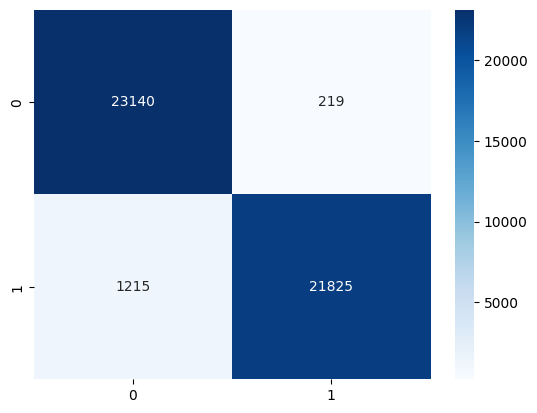

In [97]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [98]:
print(classification_report(y_true=y_test, y_pred=y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     23359
           1       0.99      0.95      0.97     23040

    accuracy                           0.97     46399
   macro avg       0.97      0.97      0.97     46399
weighted avg       0.97      0.97      0.97     46399



#### 6. Save the model for predictions

In [99]:
import pickle

In [100]:
# Save the model with highest protocol available
with open('status_pred_model.pkl', 'wb') as f:
    pickle.dump(model, f, protocol=pickle.HIGHEST_PROTOCOL)

#### 7. Predicting Selling Price

In [101]:
# Define the function to evaluate the regression model
def machine_learning_regression(X, y, algorithm_list):

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for algo_name, algo_model in algorithm_list.items():
        model = algo_model.fit(X_train, y_train)
        
        r2_train = r2_score(y_train, model.predict(X_train))
        r2_test = r2_score(y_test, model.predict(x_test))
        
        print( {
            'algorithm': algo_name,
            'R2_train': r2_train,
            'R2_test': r2_test
        })

In [103]:
X = df_status.drop(columns=['selling_price_log'])
y = df_status['selling_price_log']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
param_grid_r = {'max_depth'      : [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf' : [1, 2, 4],
              'max_features'     : ['sqrt', 'log2', None]}

grid_search_r = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_r, cv=5, n_jobs=-1)
grid_search_r.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [108]:
print(grid_search_r.best_params_)
print(grid_search_r.best_score_)

{'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.9566591667279475


In [109]:
model = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test

(0.9885190077687375, 0.9599830143386601)

In [111]:
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

metrics_r = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics_r

{'R2': 0.9599830143386601,
 'Mean Absolute Error': 0.03044720200172139,
 'Mean Squared Error': 0.002271414373145591,
 'Root Mean Squared Error': 0.04765935766610363}

In [112]:
with open('selling_price_prediction.pkl', 'wb') as f:
    pickle.dump(model, f)

In [114]:
!streamlit run Home.py

^C


In [132]:
df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)